In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csvfile_path = "../data/sales/bregister_daily_{}.csv"

In [3]:
df = pd.read_csv(csvfile_path.format("202103"),encoding='shift_jis')

In [4]:
print(df["日付"].str.strip("(月)").str.strip("(火)").str.strip("(水)").str.strip("(木)").str.strip("(金)").str.strip("(土)").str.strip("(日)"))

0      03/1
1      03/2
2      03/3
3      03/4
4      03/5
5      03/6
6      03/7
7      03/8
8      03/9
9     03/10
10    03/11
11    03/12
12    03/13
13    03/14
14    03/15
15    03/16
16    03/17
17    03/18
18    03/19
19    03/20
20    03/21
21    03/22
22    03/23
23    03/24
24    03/25
25    03/26
26    03/27
27    03/28
28    03/29
29    03/30
30    03/31
31       合計
Name: 日付, dtype: object


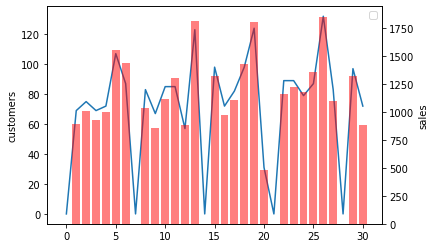

In [5]:
# データの作成
x = list(range(31))
y1 = df["客数"][:31]
y2 = df["売上高(税込)"][:31]/67

fig = plt.figure(facecolor="w")
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x, y1)
ax1.set_ylabel("customers")

# ２重軸の作成
ax2 = ax1.twinx()
ax2.bar(x, y2, color="r", alpha=0.5)
ax2.set_ylabel("sales")

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
ax1.legend(handler1 + handler2, label1 + label2)

plt.show()

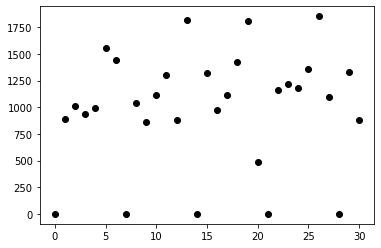

In [6]:
x = list(range(31))
y = df["売上高(税込)"][:31]/67
plt.scatter(x, y, c = "black")
plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pre_process = PolynomialFeatures(degree=2)
# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform([x])
print(X_poly)

[[  1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
   13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.
   27.  28.  29.  30.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   1.   2.   3.   4.   5.   6.   7.
    8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.
   22.  23.  24.  25.  26.  27.  28.  29.  30.   4.   6.   8.  10.  12.
   14.  16.  18.  20.  22.  24.  26.  28.  30.  32.  34.  36.  38.  40.
   42.  44.  46.  48.  50.  52.  54.  56.  58.  60.   9.  12.  15.  18.
   21.  24.  27.  30.  33.  36.  39.  42.  45.  48.  51.  54.  57.  60.
   63.  66.  69.  72.  75.  78.  81.  84.  87.  90.  16.  20.  24.  28.
   32.  36.  40.  44.  48.  52.  56.  60.  64.  68.  72.  76.  80.  84.
   88.  92.  96. 100. 104. 108. 112. 116. 120.  25.  30.  35.  40.  45.
   50.  55.  60.  65.  70.  75.  80.  85.  90.  95. 100. 105. 11

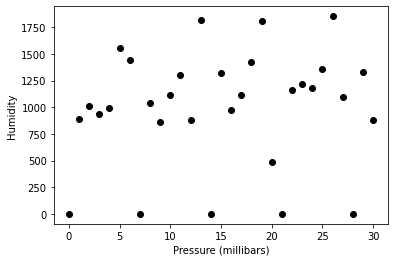

In [19]:
pr_model = LinearRegression()
# Fit our preprocessed data to the polynomial regression model
pr_model.fit(X_poly, [y])
# Store our predicted Humidity values in the variable y_new
y_pred = pr_model.predict(X_poly)

# Plot our model on our data
plt.scatter(x, y, c = "black")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.plot(x, y_pred)

In [22]:
model = LinearRegression()  #線形回帰モデルの呼び出し
model.fit(train_x, train_y)

theta0 = pr_model.intercept_
theta1, theta2 = pr_model.coef_
theta0, theta1, theta2

ValueError: too many values to unpack (expected 2)